# Exploring Sports Database

In [16]:
import scipy.io as sio
from os.path import dirname, join as pjoin
from collections import Counter
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from numpy import inf

In [22]:
data_dir = pjoin(dirname("/Users/ashvtol/Downloads/"), 'SportDB','FIT', 'S1', 'CRD1')

In [3]:
mat_fname = pjoin(data_dir, 'Data.mat')
print(mat_fname)

/Users/ashvtol/Downloads/SportDB/FIT/S1/CRD1/Data.mat


In [4]:
mat_contents = sio.loadmat(mat_fname)

mat_contents = sio.loadmat(mat_fname)

In [5]:
data = mat_contents['Data']

In [6]:
keys = ['HR', 'RR', 'BR', 'ECG']
dataMod = []
for i in range(len(keys)):
    dataMod.append(data[0,0][keys[i]])

In [7]:
dataMod

[array([[ 65],
        [ 65],
        [ 65],
        ...,
        [120],
        [119],
        [118]], dtype=uint8), array([[923.07692308],
        [923.07692308],
        [923.07692308],
        ...,
        [500.        ],
        [504.20168067],
        [508.47457627]]), array([[ 8.1],
        [ 8.1],
        [ 7.3],
        ...,
        [11.3],
        [11.7],
        [11.7]]), array([[3.798],
        [3.798],
        [3.798],
        ...,
        [1.99 ],
        [1.986],
        [1.982]])]

In [8]:
# len(data[0,0]['ECG'])/len(data[0,0]['RR'])

In [9]:
extractedData = []
for i in range(4):
    temp = []
    for j in dataMod[i]:
        temp.append(j[0])
    extractedData.append(temp)
extractedData

[[65,
  65,
  65,
  60,
  63,
  77,
  88,
  94,
  100,
  104,
  106,
  105,
  103,
  100,
  98,
  98,
  100,
  102,
  106,
  109,
  111,
  111,
  109,
  107,
  106,
  104,
  105,
  107,
  111,
  114,
  115,
  114,
  110,
  105,
  100,
  98,
  100,
  101,
  104,
  105,
  104,
  104,
  103,
  103,
  103,
  102,
  104,
  104,
  105,
  106,
  105,
  106,
  106,
  104,
  102,
  100,
  101,
  100,
  94,
  89,
  88,
  89,
  93,
  97,
  98,
  95,
  92,
  91,
  90,
  89,
  90,
  94,
  95,
  92,
  87,
  84,
  81,
  79,
  79,
  83,
  90,
  94,
  93,
  90,
  87,
  85,
  86,
  91,
  93,
  95,
  94,
  91,
  93,
  97,
  100,
  101,
  101,
  103,
  102,
  100,
  99,
  102,
  104,
  106,
  106,
  99,
  94,
  91,
  87,
  87,
  91,
  95,
  99,
  97,
  94,
  91,
  88,
  82,
  79,
  81,
  84,
  83,
  80,
  77,
  77,
  76,
  76,
  75,
  75,
  74,
  78,
  81,
  79,
  75,
  72,
  72,
  75,
  80,
  84,
  85,
  84,
  83,
  77,
  76,
  78,
  81,
  83,
  84,
  86,
  89,
  93,
  93,
  87,
  83,
  80,
  76,
  79,
 

In [10]:
len(extractedData[0])

3376

In [11]:
max(extractedData[0])

190

In [23]:
cols = ['Sport', 'Subject', 'Gender', 'Age', 'Weight', 'Height', 'Smoking', 'Alcohol', 'Weekly Training Rate', 'HR', 'BR', 'RR', 'ECG']
masterSportsDF = pd.DataFrame(columns = cols)

In [24]:
masterSportsDF.at[1,'Sport']= 'asssom'

In [25]:
masterSportsDF

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
1,asssom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
np.median(masterSportsDF['HR'][0])

KeyError: 0

In [26]:
root_dir = '/Users/ashvtol/Downloads/SportDB/'
paths = []
for filename in glob.iglob(root_dir + '**/*.mat', recursive=True):
    temp = filename.split('/')
    index = temp.index('SportDB')+1
    sport = temp[index]
    subject = temp[index+1]
    temp = filename.split('/')
    temp[-1] = 'Dem.txt'
    txtPath = '/'.join(temp)
    f = open(txtPath, 'r')
    s = f.readlines()[1]
    s = s.strip('\n')
    s = s.split('\t')
#     print(sport, subject)
    demDic = {'Sex' : s[0], 'Age': s[1], 'Weight': s[2], 'Height':s[3], 'Smoker': s[4], 'Alcool': s[5], 'Training_Rate': s[6]}
    paths.append((filename, sport, subject, demDic))
    print(sport, demDic)

JOG {'Sex': '0', 'Age': '56', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '56', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '56', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '56', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '56', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '23', 'Weight': '73', 'Height': '178', 'Smoker': 'NA', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '0', 'Age': '23', 'Weight': '73', 'Height': '178', 'Smoker': 'NA', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '1', 'Age': '24', 'Weight': 'NA', 'Height': 'NA', 'Smoker': '0', 'Alcool': 'NA', 'Training_Rate': 'NA'}
JOG {'Sex': '1', 'Age': '24', 'Weight': 'NA', 'Height': 'NA', 'Smoke

In [27]:
txtPath = '/Users/ashvtol/Downloads/SportDB/RUN/S5/CRD1/Data.mat'
temp = txtPath.split('/')
temp[-1] = 'Dem.txt'
txtPath = '/'.join(temp)
print(txtPath)
f = open(txtPath, 'r')
s = f.readlines()[1]
s = s.strip('\n')
s = s.split('\t')
demDic = {'Sex' : s[0], 'Age': s[1], 'Weight': s[2], 'Height':s[3], 'Smoker': s[4], 'Alcool': s[5], 'Training_Rate': s[6]}

/Users/ashvtol/Downloads/SportDB/RUN/S5/CRD1/Dem.txt


In [28]:
paths[0][0]

'/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD1/Data.mat'

In [29]:
paths

[('/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD1/Data.mat',
  'JOG',
  'S5',
  {'Sex': '0',
   'Age': '56',
   'Weight': 'NA',
   'Height': 'NA',
   'Smoker': '0',
   'Alcool': 'NA',
   'Training_Rate': 'NA'}),
 ('/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD3/Data.mat',
  'JOG',
  'S5',
  {'Sex': '0',
   'Age': '56',
   'Weight': 'NA',
   'Height': 'NA',
   'Smoker': '0',
   'Alcool': 'NA',
   'Training_Rate': 'NA'}),
 ('/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD4/Data.mat',
  'JOG',
  'S5',
  {'Sex': '0',
   'Age': '56',
   'Weight': 'NA',
   'Height': 'NA',
   'Smoker': '0',
   'Alcool': 'NA',
   'Training_Rate': 'NA'}),
 ('/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD5/Data.mat',
  'JOG',
  'S5',
  {'Sex': '0',
   'Age': '56',
   'Weight': 'NA',
   'Height': 'NA',
   'Smoker': '0',
   'Alcool': 'NA',
   'Training_Rate': 'NA'}),
 ('/Users/ashvtol/Downloads/SportDB/JOG/S5/CRD2/Data.mat',
  'JOG',
  'S5',
  {'Sex': '0',
   'Age': '56',
   'Weight': 'NA',
   'Height': 'NA',
   'Smoker': '0

In [65]:
cols = ['Sport', 'Subject', 'Gender', 'Age', 'Weight', 'Height', 'Smoking', 'Alcohol', 'Weekly Training Rate', 'HR', 'BR', 'RR', 'ECG']
masterSportsDF = pd.DataFrame(columns = cols)

root_dir = '/Users/ashvtol/Downloads/SportDB/'
paths = []
for filename in glob.iglob(root_dir + '**/*.mat', recursive=True):
    temp = filename.split('/')
    index = temp.index('SportDB')+1
    sport = temp[index]
    subject = temp[index+1]
    temp = filename.split('/')
    temp[-1] = 'Dem.txt'
    txtPath = '/'.join(temp)
    f = open(txtPath, 'r')
    s = f.readlines()[1]
    s = s.strip('\n')
    s = s.split('\t')
    demDic = {'Sex' : s[0], 'Age': s[1], 'Weight': s[2], 'Height':s[3], 'Smoker': s[4], 'Alcool': s[5], 'Training_Rate': s[6]}
    
    
    
    paths.append((filename, sport, subject, demDic))
    print(sport, demDic)

# for i in range(len(paths)):
#     mat_fname = paths[i][0]
#     mat_contents = sio.loadmat(mat_fname)
#     data = mat_contents['Data']
#     keys = ['HR', 'RR', 'BR', 'ECG']
#     dataMod = []
#     for k in range(len(keys)):
#         dataMod.append(data[0,0][keys[k]])

#     extractedData = []
#     for m in range(4):
#         temp = []
#         for n in dataMod[m]:
#             temp.append(n[0])
#         extractedData.append(temp)
#     masterSportsDF.at[i,'HR']=extractedData[0]
#     masterSportsDF.at[i,'RR']=extractedData[1]
#     masterSportsDF.at[i,'BR']=extractedData[2]
#     masterSportsDF.at[i,'Sport'] = paths[i][1]
#     masterSportsDF.at[i,'Subject'] = paths[i][2]
#     masterSportsDF.at[i,'Gender'] = paths[i][3]['Sex']
#     masterSportsDF.at[i,'Age'] = paths[i][3]['Age']
#     masterSportsDF.at[i,'Weight'] = paths[i][3]['Weight']
#     masterSportsDF.at[i,'Height'] = paths[i][3]['Height']
#     masterSportsDF.at[i,'Smoking'] = paths[i][3]['Smoker']
#     masterSportsDF.at[i,'Alcohol'] = paths[i][3]['Alcool']
#     masterSportsDF.at[i,'Weekly Training Rate'] = paths[i][3]['Training_Rate']
    
    

['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S5', 'CRD1', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S5', 'CRD3', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S5', 'CRD4', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S5', 'CRD5', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S5', 'CRD2', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S2', 'CRD1', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S2', 'CRD2', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S3', 'CRD1', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S3', 'CRD3', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S3', 'CRD4', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S3', 'CRD2', 'Data.mat']
['', 'Users', 'ashvtol', 'Downloads', 'SportDB', 'JOG', 'S4', 'CRD1', 'Data.mat']
['', 'Users', 'a

In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# masterSportsDF

In [ ]:
# masterSportsDF['Weekly Training Rate'].describe

In [32]:
masterSportsDF.to_csv('MasterSportDatabase.csv', index = False)

In [33]:
masterSportsDF = pd.read_csv('MasterSportDatabase.csv')

In [34]:
loadTest.shape[0]

NameError: name 'loadTest' is not defined

In [35]:
masterSportsDF.tail(20)

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
106,BAS,S9,0,22.0,72.0,172.0,1.0,1.0,4.0,"[65, 65, 62, 80, 102, 130, 143, 147, 148, 147,...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.0, 8.0, ...","[923.0769230769231, 923.0769230769231, 967.741...",NaN
107,RUN,S5,0,21.0,74.0,184.0,0.0,1.0,1.0,"[129, 127, 127, 130, 130, 130, 126, 124, 123, ...","[29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29....","[465.1162790697674, 472.4409448818898, 472.440...",NaN
108,RUN,S2,0,23.0,74.0,192.0,0.0,1.0,3.0,"[111, 113, 112, 110, 108, 109, 111, 114, 116, ...","[18.9, 18.8, 18.8, 19.1, 19.1, 19.5, 19.5, 20....","[540.5405405405405, 530.9734513274336, 535.714...",NaN
109,RUN,S3,0,21.0,61.0,169.0,0.0,0.0,3.0,"[120, 122, 124, 126, 130, 132, 136, 139, 141, ...","[14.6, 14.6, 14.7, 14.7, 14.8, 14.8, 15.0, 15....","[500.0, 491.8032786885246, 483.8709677419355, ...",NaN
110,RUN,S4,0,19.0,65.0,175.0,1.0,1.0,3.0,"[110, 112, 113, 113, 112, 111, 109, 107, 108, ...","[11.7, 11.7, 12.3, 12.3, 13.2, 13.2, 13.9, 13....","[545.4545454545454, 535.7142857142857, 530.973...",NaN
111,RUN,S10,0,20.0,77.0,177.0,1.0,1.0,4.0,"[87, 86, 85, 87, 89, 93, 97, 99, 101, 104, 104...","[17.2, 17.2, 17.4, 17.4, 17.6, 17.6, 18.0, 18....","[689.6551724137931, 697.6744186046512, 705.882...",NaN
112,RUN,S8,0,26.0,65.0,173.0,1.0,1.0,3.0,"[112, 116, 119, 120, 121, 121, 121, 120, 120, ...","[26.2, 26.3, 26.3, 26.7, 26.7, 26.4, 26.4, 26....","[535.7142857142857, 517.2413793103449, 504.201...",NaN
113,RUN,S1,1,22.0,67.0,173.0,1.0,1.0,2.0,"[147, 146, 146, 146, 147, 147, 147, 147, 147, ...","[23.0, 22.1, 22.1, 21.5, 21.5, 20.0, 20.0, 18....","[408.16326530612247, 410.958904109589, 410.958...",NaN
114,RUN,S6,0,28.0,65.0,178.0,0.0,1.0,2.0,"[140, 139, 138, 138, 138, 136, 134, 134, 134, ...","[19.5, 19.5, 19.6, 19.6, 20.1, 20.1, 20.5, 20....","[428.57142857142856, 431.65467625899277, 434.7...",NaN
115,RUN,S7,0,22.0,72.0,188.0,1.0,1.0,2.0,"[137, 137, 134, 131, 125, 127, 129, 131, 133, ...","[28.0, 27.9, 27.9, 25.2, 25.2, 22.6, 22.6, 20....","[437.95620437956205, 437.95620437956205, 447.7...",NaN


In [242]:
import ast
for i in range(loadTest.shape[0]):
    loadTest['HR'][i] = ast.literal_eval(loadTest['HR'][i])
#     res = ast.literal_eval(nonSmoker['HR'][0])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Fit Dataset

In [36]:
fitDF = masterSportsDF[masterSportsDF['Sport'] == 'AER']

In [37]:
fitDF

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
123,AER,S2,1,23.0,52.0,160.0,NaN,NaN,NaN,"[65, 65, 62, 69, 84, 96, 101, 102, 100, 99, 99...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.1, 8.1, ...","[923.0769230769231, 923.0769230769231, 967.741...",NaN
124,AER,S3,1,29.0,58.0,158.0,NaN,NaN,NaN,"[65, 65, 75, 87, 93, 97, 100, 101, 103, 104, 1...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.1, 8.1, ...","[923.0769230769231, 923.0769230769231, 800.0, ...",NaN
125,AER,S1,1,24.0,50.0,160.0,NaN,NaN,NaN,"[65, 65, 60, 63, 64, 56, 52, 49, 48, 47, 47, 4...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.2, 7.2, ...","[923.0769230769231, 923.0769230769231, 1000.0,...",NaN


In [62]:
l = ast.literal_eval(fitDF['RR'].iloc[2])

In [63]:
len(l)

7654

In [123]:
fitDF = loadTest[loadTest['Sport'] == 'FIT']

#### Filtering into different categories

In [135]:
# non smoker + non alcool
# non smoker + alcool
# smoker + non alcool
# smoker + alcool

nsna = fitDF[(fitDF['Smoking'] == 0) & (fitDF['Alcohol'] == 0)]
nsa = fitDF[(fitDF['Smoking'] == 0) & (fitDF['Alcohol'] == 1)]
sna = fitDF[(fitDF['Smoking'] == 1) & (fitDF['Alcohol'] == 0)]
sa = fitDF[(fitDF['Smoking'] == 1) & (fitDF['Alcohol'] == 1)]

nsna = nsna.reset_index()
nsa = nsa.reset_index()
sna = sna.reset_index()
sa = sa.reset_index()


In [136]:
nsna

,index,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
0,19,FIT,S5,0,29.0,79.0,179.0,0.0,0.0,4.0,"[65, 65, 60, 59, 79, 89, 94, 97, 99, 100, 100,...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.2, 7.2, ...","[923.0769230769231, 923.0769230769231, 1000.0,...",NaN
1,24,FIT,S1,0,22.0,78.0,177.0,0.0,0.0,3.0,"[65, 65, 65, 60, 63, 77, 88, 94, 100, 104, 106...","[8.1, 8.1, 7.3, 7.3, 6.6, 6.6, 5.9, 5.9, 6.3, ...","[923.0769230769231, 923.0769230769231, 923.076...",NaN


In [132]:
nsa

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
21,FIT,S3,1,21.0,62.0,164.0,0.0,1.0,4.0,"[65, 65, 60, 68, 70, 68, 68, 74, 88, 94, 98, 1...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.1, 8.1, ...","[923.0769230769231, 923.0769230769231, 1000.0,...",NaN
22,FIT,S4,0,24.0,70.0,173.0,0.0,1.0,3.0,"[65, 65, 62, 77, 88, 91, 90, 87, 84, 89, 93, 9...","[8.1, 7.3, 7.3, 6.6, 6.6, 5.9, 5.9, 6.3, 6.3, ...","[923.0769230769231, 923.0769230769231, 967.741...",NaN


In [133]:
sna

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,ECG
23,FIT,S8,1,24.0,65.0,170.0,1.0,0.0,3.0,"[65, 65, 60, 68, 79, 86, 94, 97, 98, 98, 98, 9...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.3, 7.3, ...","[923.0769230769231, 923.0769230769231, 1000.0,...",NaN
26,FIT,S7,0,36.0,95.0,183.0,1.0,0.0,4.0,"[65, 65, 65, 65, 65, 65, 0, 0, 0, 0, 0, 60, 54...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.3, 7.3, ...","[923.0769230769231, 923.0769230769231, 923.076...",NaN


In [139]:
sa['HR'].shape[0]

2

In [140]:
def extract_values(temp_df):
    temp = temp_df[0]
    for i in range(1, temp_df.shape[0]):
        temp.extend(temp_df[i])
    return temp

In [144]:
temp_nsna=extract_values(nsna['HR'])
temp_nsa=extract_values(nsa['HR'])
temp_sna=extract_values(sna['HR'])
temp_sa=extract_values(sa['HR'])



In [149]:
len(temp_nsna)

9853

In [151]:
len(temp_nsa)

6259

In [152]:
len(temp_sna)

6402

In [153]:
len(temp_sa)

6596

In [210]:
df1 = pd.DataFrame(temp_nsna, columns=['Non-Smoker Non-Alcohol'])
df1['Non-Smoker Alcohol'] = (pd.DataFrame(temp_nsa))
df1['Smoker Non-Alcohol'] = pd.DataFrame(temp_sna)
df1['Smoker Alcohol'] = pd.DataFrame(temp_sa)


In [211]:
df1

,Non-Smoker Non-Alcohol,Non-Smoker Alcohol,Smoker Non-Alcohol,Smoker Alcohol
0,65,65.0,65.0,65.0
1,65,65.0,65.0,65.0
2,60,60.0,60.0,65.0
3,59,68.0,68.0,60.0
4,79,70.0,79.0,59.0
5,89,68.0,86.0,67.0
6,94,68.0,94.0,70.0
7,97,74.0,97.0,66.0
8,99,88.0,98.0,62.0
9,100,94.0,98.0,61.0


In [198]:
range(1, df1.shape[1])

range(1, 2)

In [183]:
list(df.columns) 

['a']

### boxplot

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 11 Text yticklabel objects>)

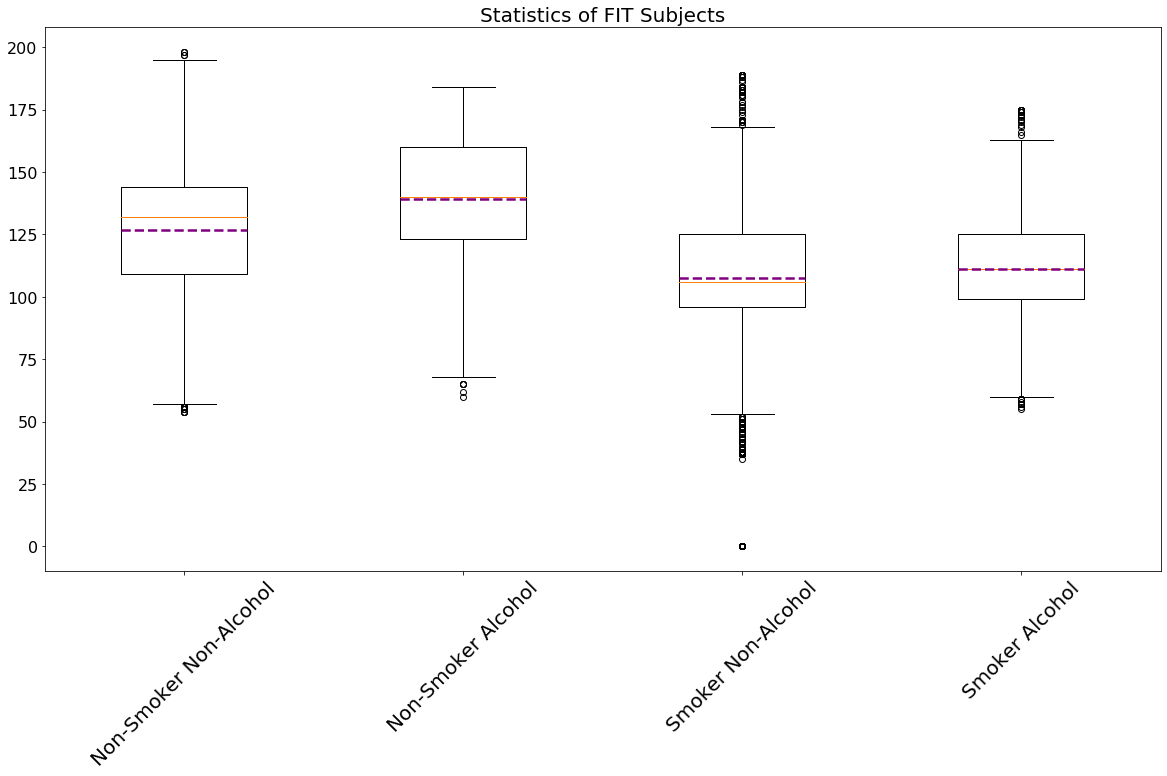

In [230]:
# ax = sns.boxplot(x=df.columns, data=df.values)
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title('Statistics of FIT Subjects' , size = 20)
ax1.boxplot(df1.dropna().values, meanprops=meanlineprops, meanline=True,
               showmeans=True)
plt.xticks(range(1, df1.shape[1]+1) ,list(df1.columns), rotation = 45, size = 20)
plt.yticks(size = 16)
# colors = ['blue', 'green', 'purple', 'tan']
 
# fig, ax= plt.subplots()
# ax.boxplot(df.values)
# plt.xticks(df.columns)
# plt.show()

In [231]:
## Plot function

In [ ]:
def extract_values(temp_df):
    temp = temp_df[0]
    for i in range(1, temp_df.shape[0]):
        temp_df[i].replace('inf', '0')
        temp.extend(temp_df[i])
    return temp

In [232]:
def plotboxplot(a,b,c,d, plotTitle):

    temp_nsna = extract_values(a)
    temp_nsa = extract_values(b)
    temp_sna = extract_values(c)
    temp_sa = extract_values(d)
    
    df1 = pd.DataFrame(temp_nsna, columns=['Non-Smoker Non-Alcohol'])
    df1['Non-Smoker Alcohol'] = (pd.DataFrame(temp_nsa))
    df1['Smoker Non-Alcohol'] = pd.DataFrame(temp_sna)
    df1['Smoker Alcohol'] = pd.DataFrame(temp_sa)
    
    meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    ax1.set_title(plotTitle, size=20)
    ax1.boxplot(df1.dropna().values, meanprops=meanlineprops, meanline=True,
                showmeans=True)
    plt.xticks(range(1, df1.shape[1] + 1), list(df1.columns), rotation=45, size=20)
    plt.yticks(size=16)

AttributeError: 'str' object has no attribute 'extend'

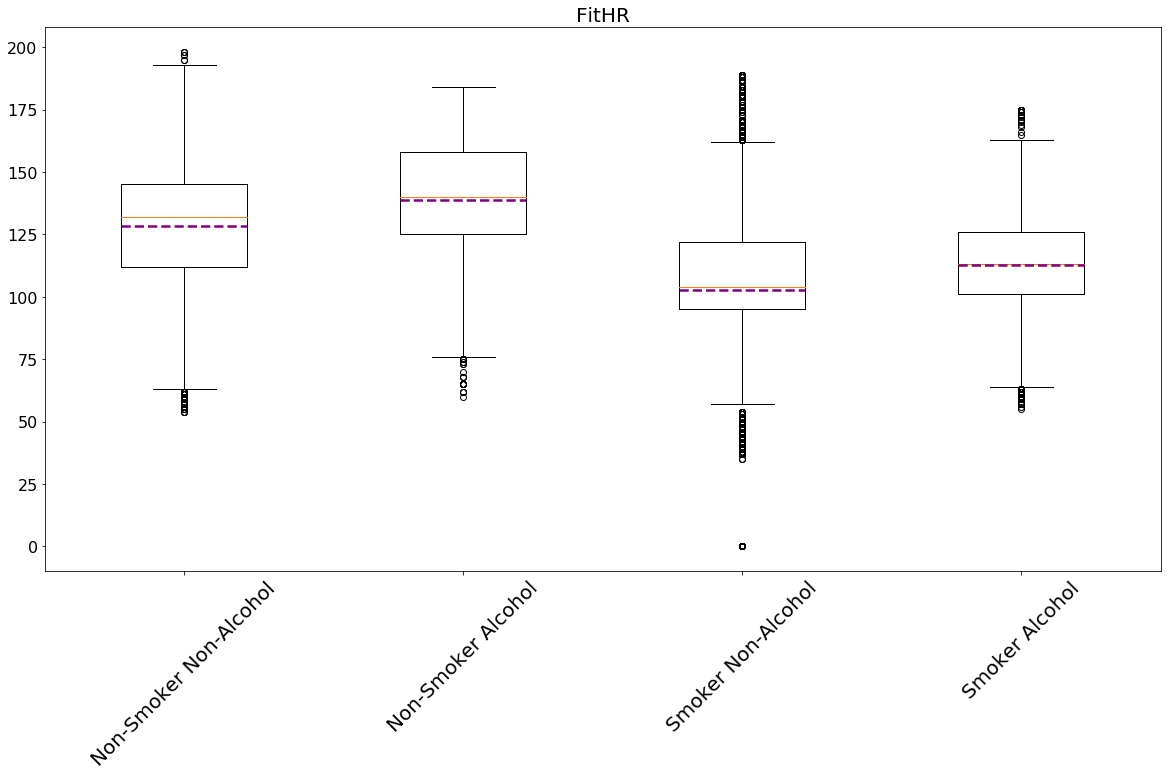

In [235]:
keys = ['HR', 'RR', 'BR']
for key in keys:
    plotboxplot(nsna[key],nsa[key],sna[key],sa[key], 'Fit' + key)

In [324]:
keys = ['RR']
for key in keys:
    for i in range(loadTest.shape[0]):
        loadTest[key][i] = ast.literal_eval(loadTest[key][i])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ValueError: malformed node or string: <_ast.Name object at 0x1369e0250>

In [328]:
loadTest['RR'][1]

[923.0769230769231,
 923.0769230769231,
 923.0769230769231,
 1052.6315789473683,
 1132.0754716981132,
 1176.4705882352941,
 1304.3478260869565,
 1250.0,
 1224.4897959183675,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 0,
 1000.0,
 789.4736842105264,
 689.6551724137931,
 659.3406593406594,
 645.1612903225806,
 638.2978723404256,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 638.2978723404256,
 638.2978723404256,
 638.2978723404256,
 638.2978723404256,
 638.2978723404256,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 631.578947368421,
 0,
 1052.6315789473683,
 1132.0754716981132,
 1176.4705882352941,
 1176.4705882352941,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 1200.0,
 0,
 0,
 0,
 0,
 0,
 0,
 967.741935483871,
 967.741935483871,
 983.6065573770492,
 1000.0,
 1090.9090909090908,
 1

In [345]:
def extract_values(temp_df):
    temp = temp_df[0]
    for i in range(1, temp_df.shape[0]):
        temp.extend(temp_df[i])
    return temp

In [349]:
loadTest = pd.read_csv('MasterSportDatabase.csv')

keys = ['HR', 'RR', 'BR']
for key in keys:
    for i in range(loadTest.shape[0]):
        loadTest[key][i] = loadTest[key][i].replace('inf','0')
        loadTest[key][i] = ast.literal_eval(loadTest[key][i])



def plotboxplot(key, plotTitle, sport):
    filteredDF = loadTest[loadTest['Sport'] == sport]
    nsna = filteredDF[(filteredDF['Smoking'] == 0) & (filteredDF['Alcohol'] == 0)]
    nsa = filteredDF[(filteredDF['Smoking'] == 0) & (filteredDF['Alcohol'] == 1)]
    sna = filteredDF[(filteredDF['Smoking'] == 1) & (filteredDF['Alcohol'] == 0)]
    sa = filteredDF[(filteredDF['Smoking'] == 1) & (filteredDF['Alcohol'] == 1)]

    nsna = nsna.reset_index()
    nsa = nsa.reset_index()
    sna = sna.reset_index()
    sa = sa.reset_index()

    temp_nsna = extract_values(nsna[key])
    temp_nsa = extract_values(nsa[key])
    temp_sna = extract_values(sna[key])
    temp_sa = extract_values(sa[key])

    df1 = pd.DataFrame(temp_nsna, columns=['Non-Smoker Non-Alcohol'])
    df1['Non-Smoker Alcohol'] = (pd.DataFrame(temp_nsa))
    df1['Smoker Non-Alcohol'] = pd.DataFrame(temp_sna)
    df1['Smoker Alcohol'] = pd.DataFrame(temp_sa)

    meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
    fig1, ax1 = plt.subplots(figsize=(20, 10))
    ax1.set_title(plotTitle, size=20)
    ax1.boxplot(df1.dropna().values, meanprops=meanlineprops, meanline=True,
                showmeans=True)
    plt.xticks(range(1, df1.shape[1] + 1), list(df1.columns), rotation=45, size=20)
    plt.yticks(size=16)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


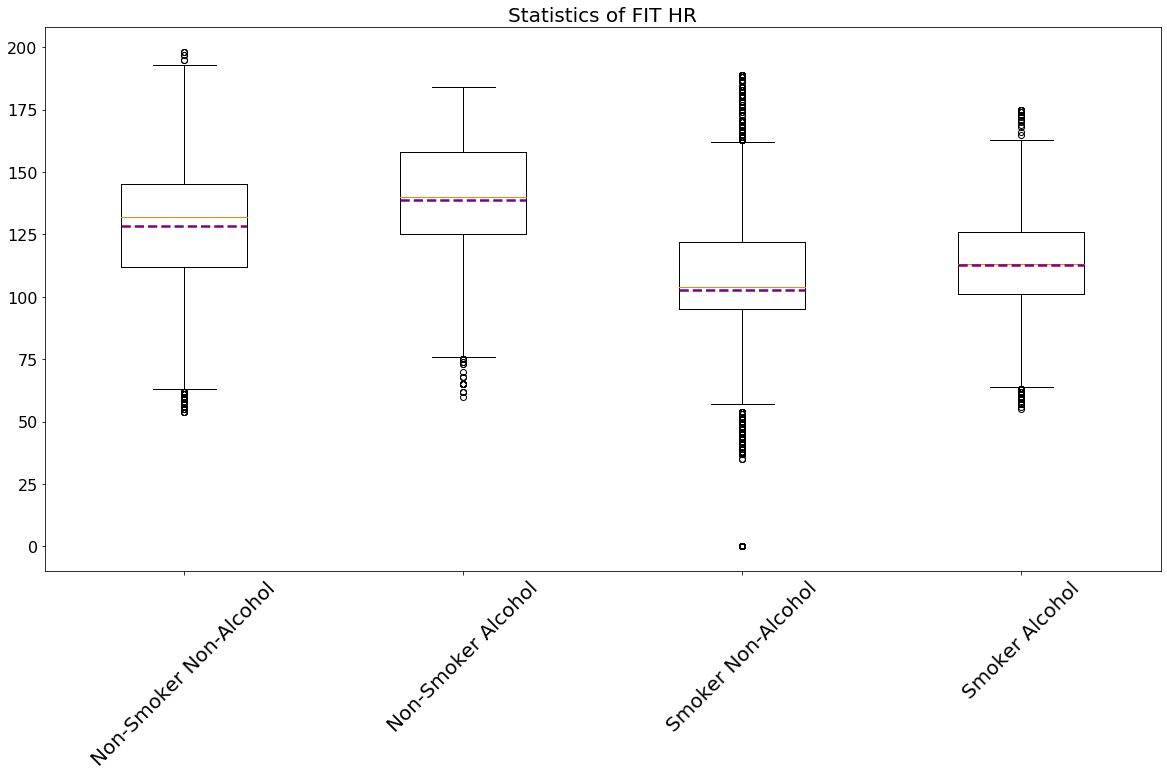

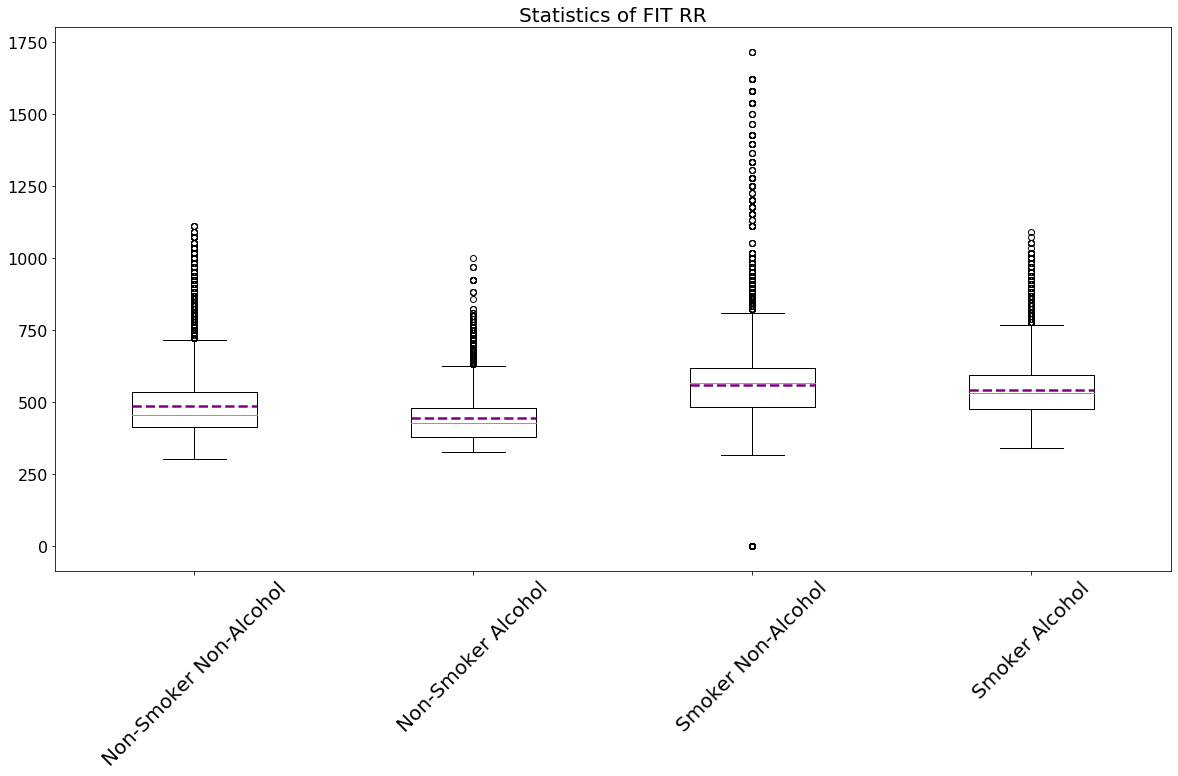

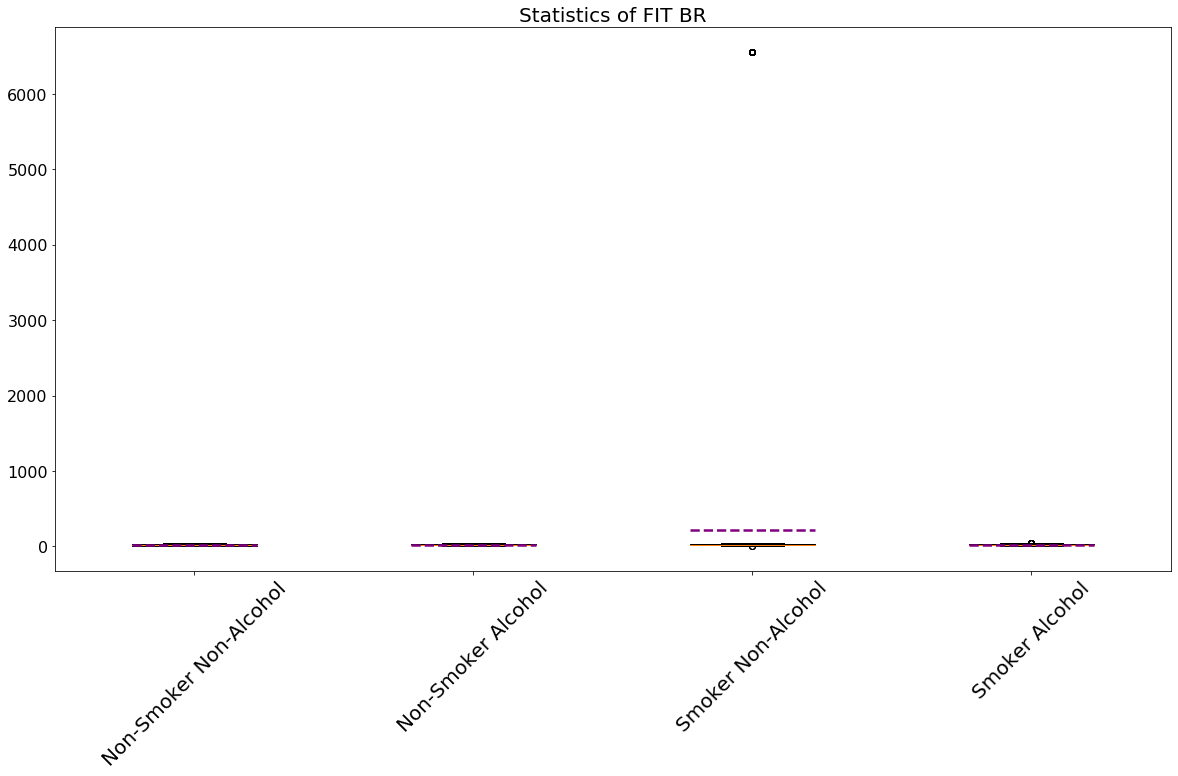

In [367]:
sport = 'FIT'
for key in keys:
    plotboxplot(key, 'Statistics of ' + sport + ' ' + key, sport)

In [31]:
cols = ['Sport', 'Subject', 'Gender', 'Age', 'Weight', 'Height', 'Smoking', 'Alcohol', 'Weekly Training Rate', 'HR', 'BR', 'RR', 'Resting-Elapsed', 'Exercise-Elapsed','Recovery-Elapsed']
masterSportsDF = pd.DataFrame(columns = cols)


import time

def isTimeFormat(input):
    try:
        time.strptime(input, '%H:%M:%S')
        return True
    except ValueError:
        return False
    
def get_sec(start, end):
    """Get Seconds from time."""
    hs, ms, ss = start.split(':')
    he, me, se = end.split(':')
    startvalue = int(hs) * 3600 + int(ms) * 60 + int(ss)
    endpvalue = int(he) * 3600 + int(me) * 60 + int(se)
    return endpvalue - startvalue


root_dir = '/Users/ashvtol/Downloads/SportDB/'
paths = []
for filename in glob.iglob(root_dir + '**/*.mat', recursive=True):
    temp = filename.split('/')
    index = temp.index('SportDB')+1
    sport = temp[index]
    subject = temp[index+1]
    temp = filename.split('/')
    temp[-1] = 'Dem.txt'
    txtPath = '/'.join(temp)
    f = open(txtPath, 'r')
    s = f.readlines()[1]
    s = s.strip('\n')
    s = s.split('\t')
    demDic = {'Sex' : s[0], 'Age': s[1], 'Weight': s[2], 'Height':s[3], 'Smoker': s[4], 'Alcool': s[5], 'Training_Rate': s[6]}
    f.close()
    temp[-1] = 'TrNote.txt'
    trNotes = []
    txtPath = '/'.join(temp)
    f = open(txtPath, 'r')
    l = f.readlines()
    if(len(l) <=6 ):
        flag = 0
        for line in l:
            line = line.strip('\n')
            if("from" in line):
                extractcolon = line.split('from')
                tag = extractcolon[0].strip(' ')
                tag = extractcolon[0].strip('\ufeff')
                extractdata = extractcolon[1].split('to')
                startphase = extractdata[0].strip(' ')
                endphase = extractdata[1].strip(' ')
#                 print(isTimeFormat(startphase), isTimeFormat(endphase))
#                 print(startphase,':',endphase)
                if(isTimeFormat(startphase) and isTimeFormat(endphase)):
                    result = get_sec(startphase,endphase)
                    trNotes.append((tag, result))
#     print(sport, subject , temp[-2] ,trNotes)
    # filtering Resting Exercise Recovery
    f.close()
    trDic = {}
    if(len(trNotes) > 0):
#         print(trNotes[0][0])
        for i in trNotes:
            if('Resting' in i[0]):
                trDic['Resting'] = i[1]
            if('Exercise' in i[0]):
                trDic['Exercise'] = i[1]
            if('Recovery' in i[0]):
                trDic['Recovery'] = i[1]    
#         if(('Resting' in trNotes[0][0]) or ('Exercise' in trNotes[0][0]) or ('Recovery' in trNotes[0][0])):
#             trDic = {'Resting': trNotes[0][1], 'Exercise': trNotes[1][1], 'Recovery': trNotes[2][1]}
#         print(trDic)
    demDic = {'Sex' : s[0], 'Age': s[1], 'Weight': s[2], 'Height':s[3], 'Smoker': s[4], 'Alcool': s[5], 'Training_Rate': s[6]}
    paths.append((filename, sport, subject, demDic, trDic))
#     print(sport, trDic)

for i in range(len(paths)):
    mat_fname = paths[i][0]
    mat_contents = sio.loadmat(mat_fname)
    data = mat_contents['Data']
    keys = ['HR', 'RR', 'BR', 'ECG']
    dataMod = []
    for k in range(len(keys)):
        dataMod.append(data[0,0][keys[k]])

    extractedData = []
    for m in range(4):
        temp = []
        for n in dataMod[m]:
            temp.append(n[0])
        extractedData.append(temp)
    masterSportsDF.at[i,'HR']=extractedData[0]
    ## converting to inf to 0 in RR, since HR has zeroes.
    x = np.array(extractedData[1])
    x[x == inf]=0
    y = x.tolist()
    masterSportsDF.at[i,'RR']=y

    masterSportsDF.at[i,'BR']=extractedData[2]
    masterSportsDF.at[i,'Sport'] = paths[i][1]
    masterSportsDF.at[i,'Subject'] = paths[i][2]
    masterSportsDF.at[i,'Gender'] = paths[i][3]['Sex']
    masterSportsDF.at[i,'Age'] = paths[i][3]['Age']
    masterSportsDF.at[i,'Weight'] = paths[i][3]['Weight']
    masterSportsDF.at[i,'Height'] = paths[i][3]['Height']
    masterSportsDF.at[i,'Smoking'] = paths[i][3]['Smoker']
    masterSportsDF.at[i,'Alcohol'] = paths[i][3]['Alcool']
    masterSportsDF.at[i,'Weekly Training Rate'] = paths[i][3]['Training_Rate']
    if('Resting' in paths[i][4].keys()):
        masterSportsDF.at[i,'Resting-Elapsed'] = paths[i][4]['Resting']
    if('Exercise' in paths[i][4].keys()):
        masterSportsDF.at[i,'Exercise-Elapsed'] = paths[i][4]['Exercise']
    if('Recovery' in paths[i][4].keys()):
        masterSportsDF.at[i,'Recovery-Elapsed'] = paths[i][4]['Recovery']
    

In [5]:
masterSportsDF

,Sport,Subject,Gender,Age,Weight,Height,Smoking,Alcohol,Weekly Training Rate,HR,BR,RR,Resting-Elapsed,Exercise-Elapsed,Recovery-Elapsed
0,JOG,S5,0,56,NA,NA,0,NA,NA,"[65, 65, 62, 77, 88, 91, 90, 88, 88, 88, 82, 8...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.2, 8.2, ...","[923.0769230769231, 923.0769230769231, 967.741...",373,4739,NaN
1,JOG,S5,0,56,NA,NA,0,NA,NA,"[65, 65, 65, 57, 53, 51, 46, 48, 49, 50, 50, 5...","[8.1, 8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.3, ...","[923.0769230769231, 923.0769230769231, 923.076...",1141,1715,1183
2,JOG,S5,0,56,NA,NA,0,NA,NA,"[65, 65, 65, 65, 60, 54, 52, 51, 47, 49, 44, 4...","[8.1, 8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.2, ...","[923.0769230769231, 923.0769230769231, 923.076...",1046,2339,734
3,JOG,S5,0,56,NA,NA,0,NA,NA,"[65, 65, 65, 65, 65, 60, 53, 65, 70, 72, 74, 7...","[8.1, 8.1, 7.3, 7.3, 6.6, 6.6, 5.9, 5.9, 6.3, ...","[923.0769230769231, 923.0769230769231, 923.076...",NaN,1947,NaN
4,JOG,S5,0,56,NA,NA,0,NA,NA,"[65, 65, 62, 69, 83, 90, 92, 94, 94, 94, 94, 9...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.2, 7.2, ...","[923.0769230769231, 923.0769230769231, 967.741...",161,2179,671
5,JOG,S2,0,23,73,178,NA,NA,NA,"[65, 65, 65, 65, 65, 65, 0, 0, 0, 0, 0, 0, 0, ...","[8.1, 8.3, 8.3, 8.5, 8.5, 8.7, 8.7, 9.0, 9.0, ...","[923.0769230769231, 923.0769230769231, 923.076...",196,2729,4031
6,JOG,S2,0,23,73,178,NA,NA,NA,"[65, 65, 65, 73, 77, 71, 68, 67, 66, 67, 70, 7...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.3, 7.3, ...","[923.0769230769231, 923.0769230769231, 923.076...",785,3556,782
7,JOG,S3,1,24,NA,NA,0,NA,NA,"[65, 65, 57, 53, 43, 39, 36, 34, 35, 35, 35, 3...","[8.1, 7.3, 7.3, 6.6, 6.6, 6.9, 6.9, 7.3, 7.3, ...","[923.0769230769231, 923.0769230769231, 1052.63...",450,1067,168
8,JOG,S3,1,24,NA,NA,0,NA,NA,"[65, 65, 65, 65, 65, 65, 65, 75, 87, 92, 94, 9...","[8.1, 8.3, 8.3, 8.5, 8.5, 8.7, 8.7, 8.9, 8.9, ...","[923.0769230769231, 923.0769230769231, 923.076...",1084,3838,685
9,JOG,S3,1,24,NA,NA,0,NA,NA,"[65, 65, 65, 62, 68, 72, 76, 77, 75, 75, 76, 7...","[8.1, 7.3, 7.3, 7.6, 7.6, 7.8, 7.8, 8.1, 8.1, ...","[923.0769230769231, 923.0769230769231, 923.076...",423,2241,334


In [32]:
masterSportsDF.to_csv('MasterSportDatabase.csv', index = False)

In [40]:
masterSportsDF.iloc[3]['RR']

[923.0769230769231,
 923.0769230769231,
 923.0769230769231,
 923.0769230769231,
 923.0769230769231,
 1000.0,
 1132.0754716981132,
 923.0769230769231,
 857.1428571428571,
 833.3333333333334,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 810.8108108108108,
 821.917808219178,
 821.917808219178,
 821.917808219178,
 821.917808219178,
 821.917808219178,
 821.917808219178,
 821.917808219178,
 833.3333333333334,
 833.3333333333334,
 833.3333333333334,
 833.3333333333334,
 833.3333333333334,
 833.3333333333334,
 833.3333333333334,
 845.0704225352113,
 857.1428571428571,
 869.5652173913044,
 869.5652173913044,
 869.5652173913044,
 882.3529411764706,
 882.3529411764706,
 882.3529411764706,
 882.3529411764706,
 882.3529411764706,
 882.3529411764706,
 0.0,
 1000.0,
 882.3529411764706,
 800.0,
 769.2307692307693,
 759.493670886076,
 750.0,
 750.0,
 750.0,
 750.0,
 750.0,
 750.0,
 0.0,
 

In [27]:
x[x == inf] = 0

In [34]:
x

array([ 923.07692308,  923.07692308,  923.07692308, ..., 1621.62162162,
          0.        ,    0.        ])